In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
sns.set()

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

In [2]:
wine_df= pd.read_csv(r'C:\Users\bgpre\Desktop\Projects\archive\winequality-red.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# EDA

In [3]:
wine_df.shape

(1599, 12)

In [4]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
wine_df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

O:\USING APPS\files\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

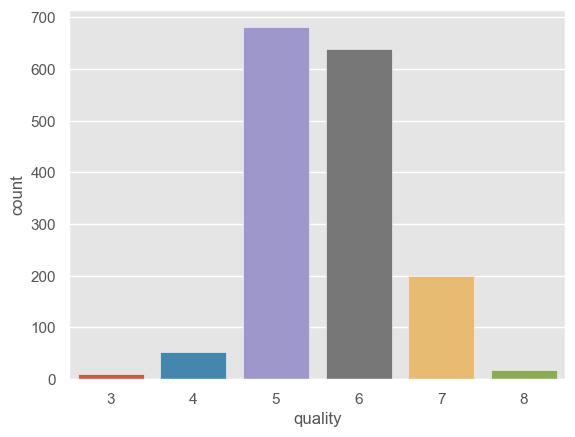

In [8]:
style.use('ggplot')
sns.countplot(wine_df['quality'])

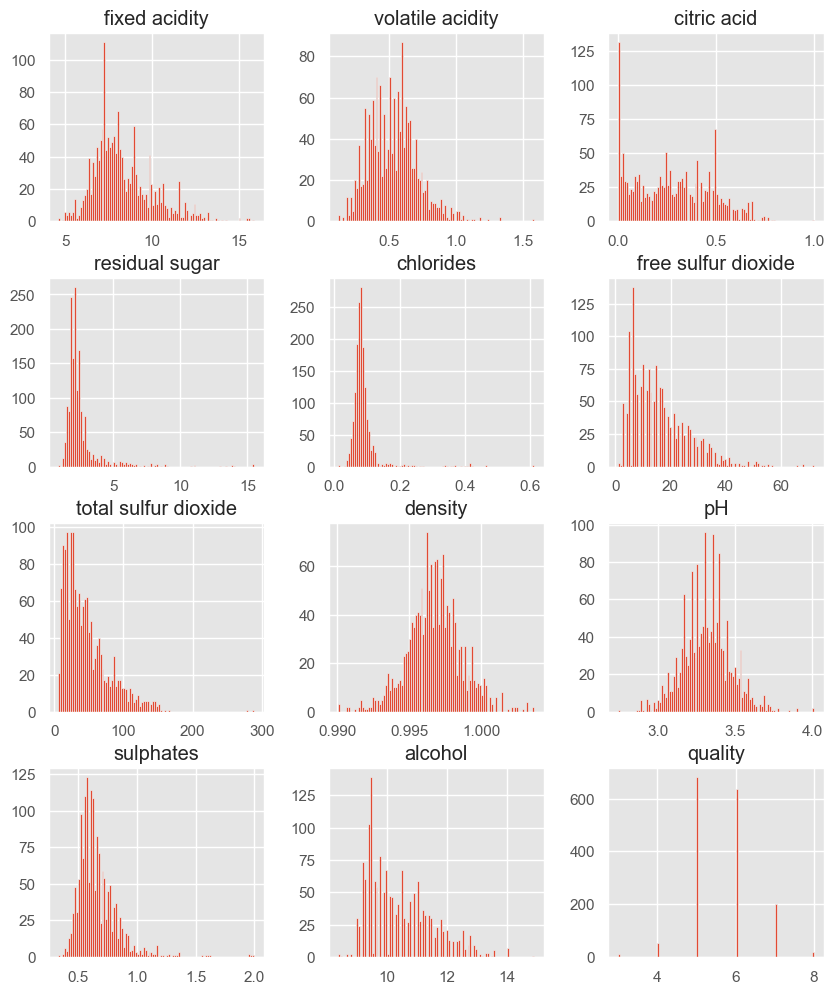

In [9]:
wine_df.hist(bins=100, figsize=(10,12))
plt.show()

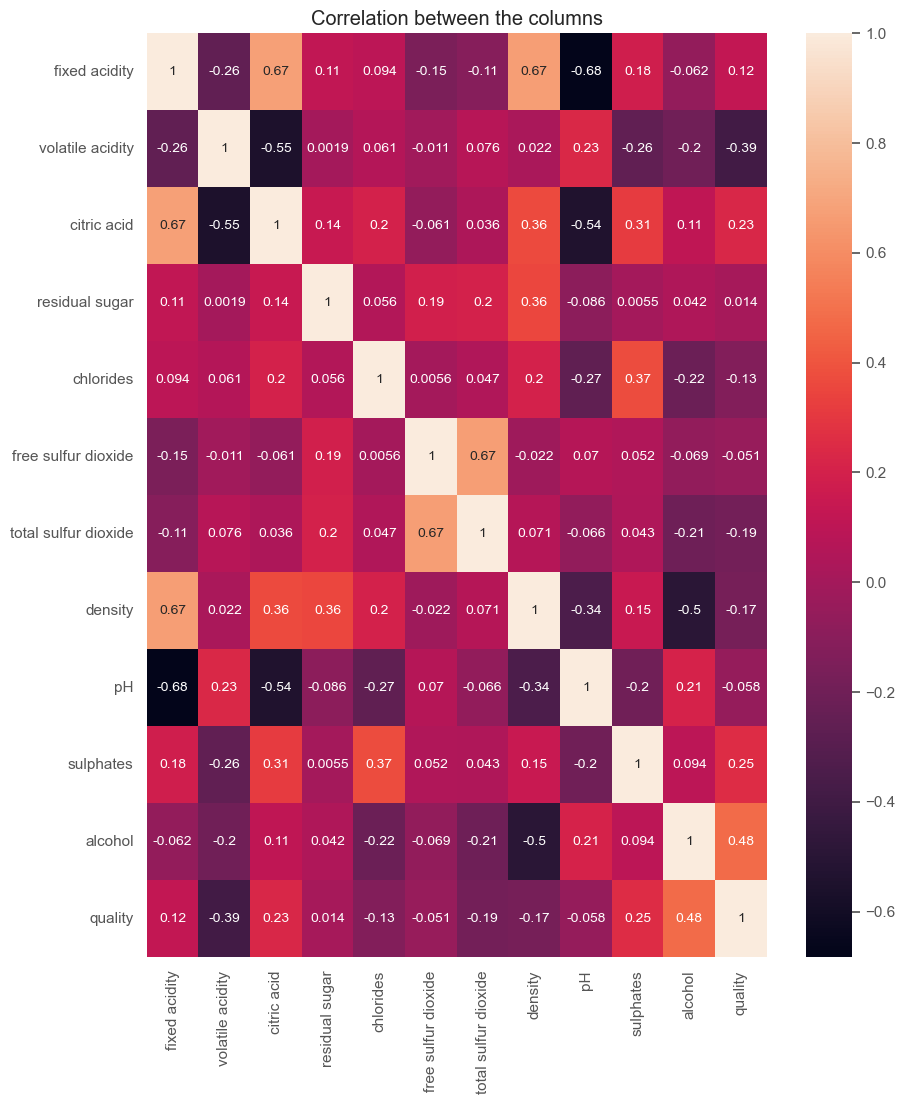

In [10]:
plt.figure(figsize=(10,12))
sns.heatmap(wine_df.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

In [11]:
wine_df.corr()['quality'].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [1]:
wine_df.corr()

NameError: name 'wine_df' is not defined

O:\USING APPS\files\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='alcohol'>

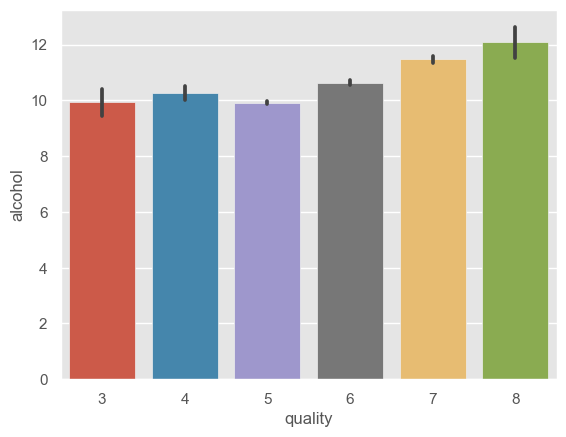

In [12]:
sns.barplot(wine_df['quality'], wine_df['alcohol'])

# # Data processing 

In [13]:
wine_df['quality'] = wine_df.quality.apply(lambda x:1 if x>=7 else 0)

In [14]:
wine_df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [15]:
X = wine_df.drop('quality', axis=1)
y = wine_df['quality']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [17]:
print("X_train" , X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (1119, 11)
y_train (1119,)
X_test (480, 11)
y_test (480,)


# Model Training

# Logistic Regression Model

In [18]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("test accuray is: {:.2f}%".format(logreg_acc*100))

test accuray is: 86.88%


O:\USING APPS\files\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       413
           1       0.58      0.21      0.31        67

    accuracy                           0.87       480
   macro avg       0.73      0.59      0.62       480
weighted avg       0.84      0.87      0.84       480



TN:  403
FN:  53
TP:  14
FP:  10


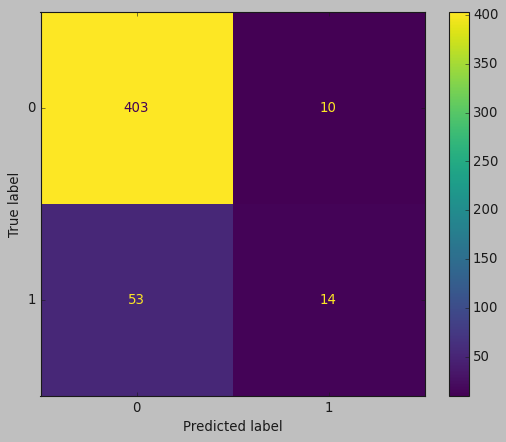

In [20]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = logreg.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

# Decision Tree

In [21]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
dtree_acc = accuracy_score(dtree_pred, y_test)
print("Test accuracy: {:.2f}%".format(dtree_acc*100))

Test accuracy: 86.25%


In [22]:
print(classification_report(y_test, dtree_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       413
           1       0.51      0.64      0.57        67

    accuracy                           0.86       480
   macro avg       0.72      0.77      0.74       480
weighted avg       0.88      0.86      0.87       480



TN:  371
FN:  24
TP:  43
FP:  42


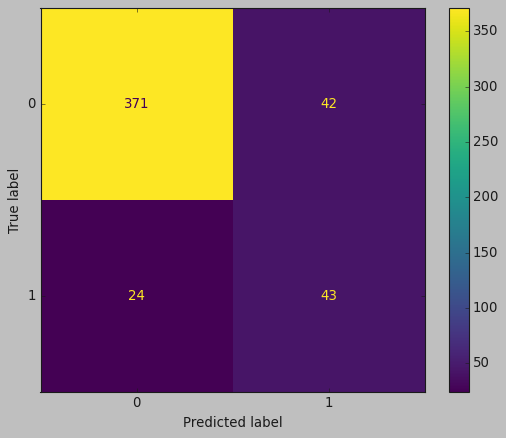

In [23]:
style.use('classic')
cm = confusion_matrix(y_test, dtree_pred, labels=dtree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dtree.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

# Random Forest

In [24]:
rforest = RandomForestClassifier()
rforest.fit(X_train, y_train)
rforest_pred = rforest.predict(X_test)
rforest_acc = accuracy_score(rforest_pred, y_test)
print("Test accuracy: {:.2f}%".format(rforest_acc*100))

Test accuracy: 88.75%


In [25]:
print(classification_report(y_test, rforest_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       413
           1       0.61      0.52      0.56        67

    accuracy                           0.89       480
   macro avg       0.77      0.73      0.75       480
weighted avg       0.88      0.89      0.88       480



TN:  391
FN:  32
TP:  35
FP:  22


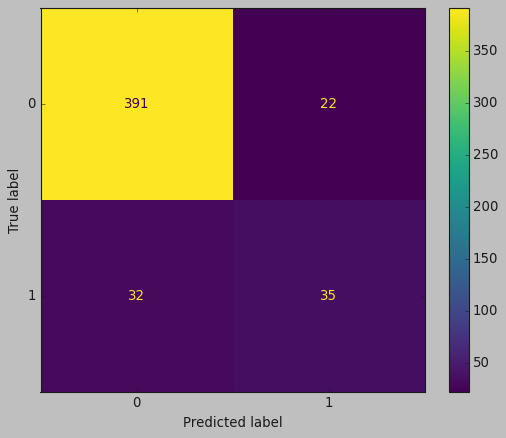

In [26]:
style.use('classic')
cm = confusion_matrix(y_test, rforest_pred, labels=rforest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rforest.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

# SVM Model

In [27]:
svmModel = SVC()
svmModel.fit(X_train, y_train)
svmModel.score(X_test, y_test)
svmModel_pred = svmModel.predict(X_test)
svmModel_acc = accuracy_score(svmModel_pred, y_test)
print("Test accuracy: {:.2f}%".format(svmModel_acc*100))

Test accuracy: 86.25%


In [28]:
svmModelCR = classification_report(y_test,svmModel_pred)
print(svmModelCR)

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       413
           1       1.00      0.01      0.03        67

    accuracy                           0.86       480
   macro avg       0.93      0.51      0.48       480
weighted avg       0.88      0.86      0.80       480



TN:  413
FN:  66
TP:  1
FP:  0


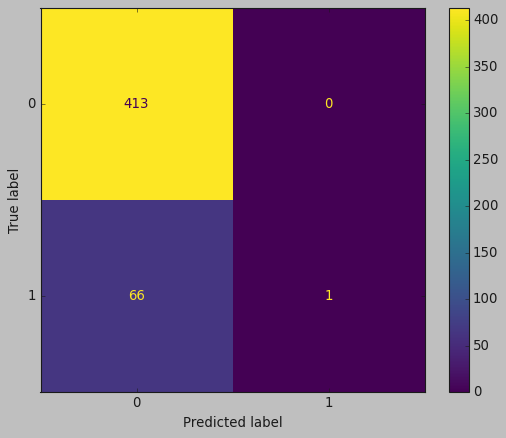

In [29]:
style.use('classic')
cm = confusion_matrix(y_test, svmModel_pred, labels=svmModel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = svmModel.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

# kNN Model 

In [30]:
knnModel = SVC()
knnModel.fit(X_train, y_train)
knnModel.score(X_test, y_test)
knnModel_pred = knnModel.predict(X_test)
knnModel_acc = accuracy_score(knnModel_pred, y_test)
print("Test accuracy: {:.2f}%".format(knnModel_acc*100))

Test accuracy: 86.25%


In [31]:
knnModelCR = classification_report(y_test,knnModel_pred)
print(knnModelCR)

              precision    recall  f1-score   support

           0       0.86      1.00      0.93       413
           1       1.00      0.01      0.03        67

    accuracy                           0.86       480
   macro avg       0.93      0.51      0.48       480
weighted avg       0.88      0.86      0.80       480



TN:  413
FN:  66
TP:  1
FP:  0


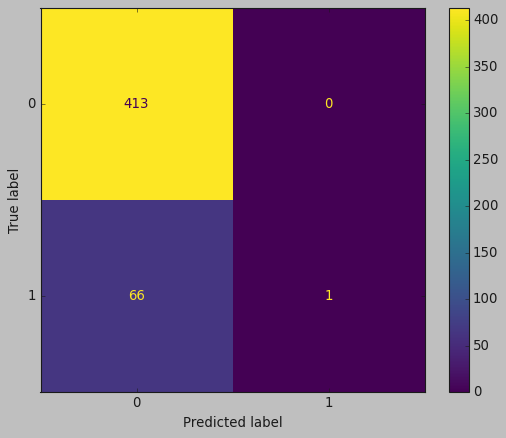

In [32]:
style.use('classic')
cm = confusion_matrix(y_test, knnModel_pred, labels=knnModel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knnModel.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

# Naive Bayes

In [33]:
nbModel = GaussianNB()
nbModel.fit(X_train, y_train)
nbModel.score(X_test, y_test)
nbModel_pred = nbModel.predict(X_test)
nbModel_acc = accuracy_score(nbModel_pred, y_test)
print("Test accuracy: {:.2f}%".format(nbModel_acc*100))

Test accuracy: 84.38%


In [34]:
nbModelCR = classification_report(y_test,nbModel_pred)
print(nbModelCR)

              precision    recall  f1-score   support

           0       0.95      0.86      0.90       413
           1       0.46      0.72      0.56        67

    accuracy                           0.84       480
   macro avg       0.71      0.79      0.73       480
weighted avg       0.88      0.84      0.86       480



TN:  357
FN:  19
TP:  48
FP:  56


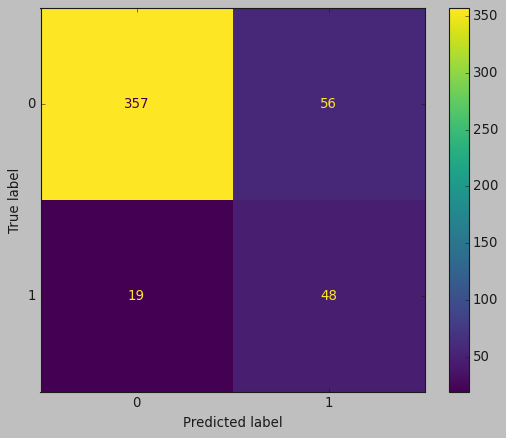

In [35]:
style.use('classic')
cm = confusion_matrix(y_test, nbModel_pred, labels=nbModel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = nbModel.classes_)
disp.plot()
print("TN: ", cm[0][0])
print("FN: ", cm[1][0])
print("TP: ", cm[1][1])
print("FP: ", cm[0][1])

# Neural Networks

# Sequential without PCA

In [37]:
wine_df1= pd.read_csv(r'C:\Users\bgpre\Desktop\Projects\archive\winequality-red.csv')
wine_df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [38]:
X = wine_df.drop('quality', axis=1)
y = wine_df['quality']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [40]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Preforming PCA

In [41]:
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [42]:
X_train.shape

(1279, 2)

In [43]:
X_test.shape

(320, 2)

In [44]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[2]),
    layers.Dense(4, activation='relu'),    
    layers.Dense(1, activation='sigmoid'),
])

In [45]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [46]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=512,
    epochs=300,
    callbacks=[early_stopping],
    verbose=1, # hide the output because we have so many epochs
)

Epoch 1/300
3/3 [==============================] - 2s 97ms/step - loss: 0.6470 - binary_accuracy: 0.8225 - val_loss: 0.6459 - val_binary_accuracy: 0.8625
Epoch 2/300
3/3 [==============================] - 0s 13ms/step - loss: 0.6434 - binary_accuracy: 0.8405 - val_loss: 0.6422 - val_binary_accuracy: 0.8687
Epoch 3/300
3/3 [==============================] - 0s 12ms/step - loss: 0.6400 - binary_accuracy: 0.8491 - val_loss: 0.6386 - val_binary_accuracy: 0.8750
Epoch 4/300
3/3 [==============================] - 0s 11ms/step - loss: 0.6366 - binary_accuracy: 0.8561 - val_loss: 0.6351 - val_binary_accuracy: 0.8750
Epoch 5/300
3/3 [==============================] - 0s 12ms/step - loss: 0.6333 - binary_accuracy: 0.8593 - val_loss: 0.6316 - val_binary_accuracy: 0.8750
Epoch 6/300
3/3 [==============================] - 0s 12ms/step - loss: 0.6299 - binary_accuracy: 0.8600 - val_loss: 0.6282 - val_binary_accuracy: 0.8750
Epoch 7/300
3/3 [==============================] - 0s 13ms/step - loss: 0.62

Epoch 54/300
3/3 [==============================] - 0s 11ms/step - loss: 0.4802 - binary_accuracy: 0.8616 - val_loss: 0.4635 - val_binary_accuracy: 0.8750
Epoch 55/300
3/3 [==============================] - 0s 12ms/step - loss: 0.4771 - binary_accuracy: 0.8616 - val_loss: 0.4600 - val_binary_accuracy: 0.8750
Epoch 56/300
3/3 [==============================] - 0s 11ms/step - loss: 0.4742 - binary_accuracy: 0.8616 - val_loss: 0.4567 - val_binary_accuracy: 0.8750
Epoch 57/300
3/3 [==============================] - 0s 12ms/step - loss: 0.4711 - binary_accuracy: 0.8616 - val_loss: 0.4533 - val_binary_accuracy: 0.8750
Epoch 58/300
3/3 [==============================] - 0s 11ms/step - loss: 0.4682 - binary_accuracy: 0.8616 - val_loss: 0.4500 - val_binary_accuracy: 0.8750
Epoch 59/300
3/3 [==============================] - 0s 11ms/step - loss: 0.4654 - binary_accuracy: 0.8616 - val_loss: 0.4467 - val_binary_accuracy: 0.8750
Epoch 60/300
3/3 [==============================] - 0s 12ms/step - los

Epoch 107/300
3/3 [==============================] - 0s 11ms/step - loss: 0.3736 - binary_accuracy: 0.8624 - val_loss: 0.3387 - val_binary_accuracy: 0.8750
Epoch 108/300
3/3 [==============================] - 0s 11ms/step - loss: 0.3725 - binary_accuracy: 0.8616 - val_loss: 0.3376 - val_binary_accuracy: 0.8750
Epoch 109/300
3/3 [==============================] - 0s 11ms/step - loss: 0.3716 - binary_accuracy: 0.8624 - val_loss: 0.3364 - val_binary_accuracy: 0.8750
Epoch 110/300
3/3 [==============================] - 0s 11ms/step - loss: 0.3707 - binary_accuracy: 0.8632 - val_loss: 0.3354 - val_binary_accuracy: 0.8750
Epoch 111/300
3/3 [==============================] - 0s 11ms/step - loss: 0.3698 - binary_accuracy: 0.8640 - val_loss: 0.3344 - val_binary_accuracy: 0.8750
Epoch 112/300
3/3 [==============================] - 0s 11ms/step - loss: 0.3690 - binary_accuracy: 0.8647 - val_loss: 0.3334 - val_binary_accuracy: 0.8750
Epoch 113/300
3/3 [==============================] - 0s 11ms/ste

In [47]:
model_loss = pd.DataFrame(model.history.history)
plt.show()

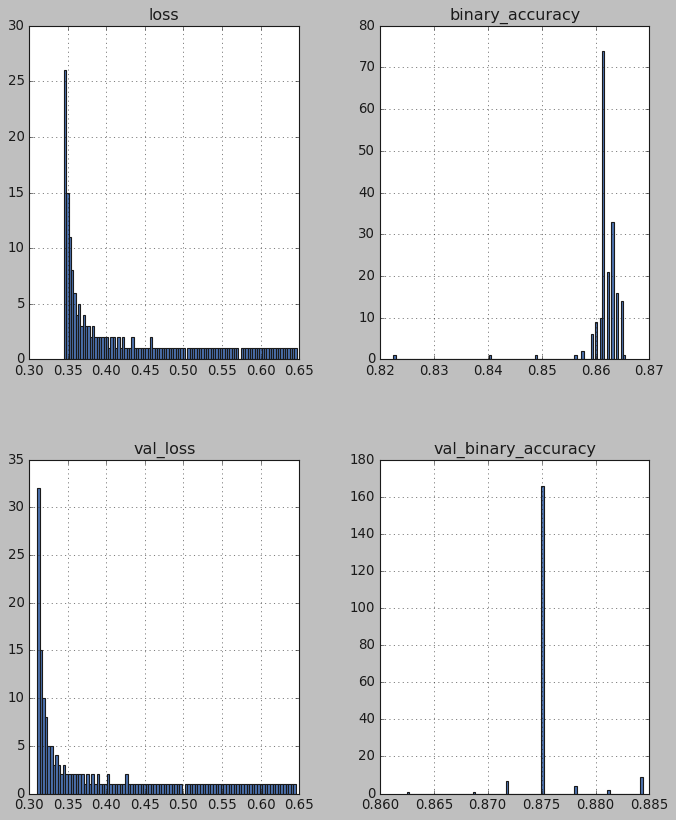

In [48]:
model_loss.hist(bins=100, figsize=(10,12))
plt.show()

In [49]:
y_pred = model.predict(X_test)

10/10 [==============================] - 0s 887us/step


In [50]:
y_pred = predictions > 0.5

NameError: name 'predictions' is not defined

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
conf_mat = confusion_matrix(y_test,y_pred)

In [ ]:
print(confusion_matrix(y_test,predictions))

In [ ]:
plt.figure(figsize = (7,5))
sns.heatmap(conf_mat,annot = True, cmap='Blues', fmt = 'g')
plt.xlabel('Prediction', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()